<h1> Reforma da previdência - apoio do congresso analisado pelo twitter</h1>

<h1> Reforma da previdência - congress support analized through twitter</h1>

<h2>Context</h2>
<br/>
Esse dataset tem portuguese tweets divided in positive, negative and neutral classes for sentiment polarity classification.
<br/>
We apply careful treatment: 

noise removal, dimensionality reduction, object standardization.

<h2>Content</h2>
<ul>
  <li>Load libraries</li>
  <li>Setup</li>
  <li>Load training dataset</li>
  <li>Load validation dataset</li>
  <li>Text preprocessing</li>
  <li>Exploratory analysis in words</li>
  <li>Bag-of-Words</li>
  <li>Prepare algorithm and run model</li>
  <li>Evaluate the model</li>
  <li>Building a pipeline MultinomialNB</li>
  <li>Building a pipeline SGDClassifier, a linear support vector machine (SVM)</li>
  <li>Parameter tuning using grid search SGDClassifier</li>
  <li>Evaluating other models</li>
  <li>Implementing a Linear Classifier (Logistic Regression)</li>
  <li>Implementing a Support Vector Machine (SVM) Model</li>
  <li>Implementing Gradient Boosting Model</li>
  <li>Implementing Neural Networks (not implemented...)</li>
</ul>

<h2>Load libraries</h2>

In [1]:
import os
import pandas as pd
import numpy as np
import random
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('rslp')
from nltk.tokenize import wordpunct_tokenize
# from nltk.tokenize import sent_tokenize (Tokenization)
from nltk.probability import FreqDist
from nltk.metrics import ConfusionMatrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

[nltk_data] Downloading package stopwords to /Users/joao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /Users/joao/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


<h2>Setup</h2>

<h2>Text Preprocessing</h2>

<h4>Planning</h4>
<ul>
  <li>Noise Removal</li>
  <li>Tokenize text with nltk</li>
  <li>Object Standardization</li>
  <li>Remove stopwords (noise removal and dimensionality reduction)</li>
  <li>Lexicon Normalization</li>
    <ul>
      <li>Lemmatization (not implemented...)</li>
      <li>Stemming (dimensionality reduction)</li>
    </ul>
</ul> 

<h4>Noise Removal</h4>

Remove urls from text (http(s), www)

In [2]:
%run NLPtricks

In [3]:
std_list = {'eh': 'é', 'vc': 'você', 'vcs': 'vocês','tb': 'também', 'tbm': 'também', 'obg': 'obrigado', 'gnt': 'gente', 'q': 'que', 'n': 'não', 'cmg': 'comigo', 'p': 'para', 'ta': 'está', 'to': 'estou', 'vdd': 'verdade'}

nltk_stopwords = nltk.corpus.stopwords.words('portuguese')

df = pd.read_fwf('STOPWORDS2/PORTUGUESE.txt', header = None)

stopword_list = []
custom_stopwords = df.values.tolist()
custom_stopwords = [s[0] for s in custom_stopwords]

stopword_list.append('é')
stopword_list.append('vou')
stopword_list.append('que')
stopword_list.append('tão')
stopword_list.append('...')
stopword_list.append('«')
stopword_list.append('➔')
stopword_list.append('|')
stopword_list.append('»')
stopword_list.append('uai') 

noisy_words = ['.',  ':', ',', ';', '(', ')', '-']   
stopword_list.extend(nltk_stopwords)
stopword_list.extend(custom_stopwords)
stopword_list.extend(noisy_words)
stopword_list = list(set(stopword_list))



# Let's apply the present model to the tweet data-set of Brazilian representatives in the congress

In [4]:
dftreino =  pd.read_csv('data.csv', delimiter=';')

In [8]:
xtreino = list(dftreino.text)

xtreino = _remove_url(xtreino)

regex_pattern = '@[\w]*'

xtreino  = _remove_regex(xtreino , regex_pattern)

emoticon_list = {':))': 'positive_emoticon', ':)': 'positive_emoticon', ':D': 'positive_emoticon', ':(': 'negative_emoticon', ':((': 'negative_emoticon', '8)': 'neutral_emoticon'}

xtreino  = _replace_emoticons(xtreino , emoticon_list)

xtreino_tokens = _tokenize_text(xtreino )

xtreino_tokens = _apply_standardization(xtreino_tokens, std_list)

xtreino_tokens = _remove_stopwords(xtreino_tokens, stopword_list)

X = _untokenize_text(xtreino_tokens)

y = list(dftreino.isFavorable)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3 )

In [12]:
model_LR = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')),
])

In [13]:
model_LR.fit(X_train, y_train)
predictions_LR = model_LR.predict(X_val)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
matrix = metrics.confusion_matrix(y_val, predictions_LR)
acc = _get_accuracy(matrix)
print(acc)

0.8308743169398907


# Trabalhando com os dados de teste obtidos com twint

In [18]:
df = pd.read_csv('tweets.csv')

In [19]:
deputados = pd.read_csv('deputadostwitter2018.csv')

In [20]:
twitterminusculo = map(lambda a:a.lower() ,list(deputados.twitter))
df['Deputado(a)']= range(len(df))
NomeParaTwitter = dict(zip(twitterminusculo,deputados.Nome))
df['Deputado(a)'] = [NomeParaTwitter[i] for i in df.username]

In [22]:

dfsimples = df.drop(['Unnamed: 0','user_id','place','replies_count', 'retweets_count', 'likes_count', 'hashtags','cashtags', 'link'], axis = 1)
dfsimples.head()

,date,time,username,name,tweet,retweet,Estado,Partido,Deputado(a)
0,2019-08-30,17:42:14,tiago_dimas,Tiago Dimas,A principal meta das pautas deste ano deve ser...,False,Tocantins,SD,Tiago Dimas
1,2019-07-11,20:01:03,tiago_dimas,Tiago Dimas,A votação da Reforma da Previdência não acabou...,False,Tocantins,SD,Tiago Dimas
2,2020-08-11,13:17:40,celiomourato,Célio Moura,"Protocolamos ADIn no STF, para anular a cruel ...",False,Tocantins,PT,Celio Moura
3,2020-06-19,10:56:31,celiomourato,Célio Moura,O Movimento Sindical debate e trata em profund...,False,Tocantins,PT,Celio Moura
4,2019-10-01,15:10:06,celiomourato,Célio Moura,"Para 43% dos brasileiros, reforma da Previdênc...",False,Tocantins,PT,Celio Moura


In [23]:
xteste = list(dfsimples.tweet)

In [24]:

xteste = _remove_url(xteste)

regex_pattern = '@[\w]*'

xteste = _remove_regex(xteste, regex_pattern)

emoticon_list = {':))': 'positive_emoticon', ':)': 'positive_emoticon', ':D': 'positive_emoticon', ':(': 'negative_emoticon', ':((': 'negative_emoticon', '8)': 'neutral_emoticon'}

xteste = _replace_emoticons(xteste, emoticon_list)


xteste_tokens = _tokenize_text(xteste)

xteste_tokens = _apply_standardization(xteste_tokens, std_list)

xteste_tokens = _remove_stopwords(xteste_tokens, stopword_list)

X = _untokenize_text(xteste_tokens)

In [25]:
predictions_NEWDATA = model_LR.predict(X)

In [26]:
dfsimples['Sentiment Analysis'] = predictions_NEWDATA

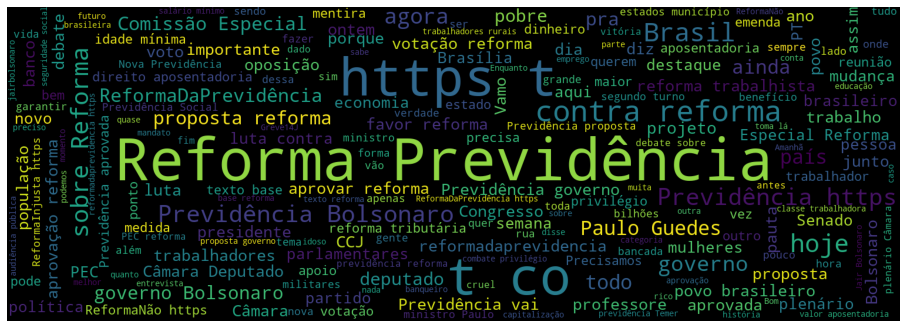

In [172]:
#sample_train = random.sample(X_tokens, 10000)
text_cloud = _get_text_cloud(X_tokens)

word_cloud = WordCloud(max_font_size = 100, width = 1520, height = 535)
word_cloud.generate(text_cloud)
plt.figure(figsize = (16, 9))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

Stemming (dimensionality reduction)